In [65]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.fft import fft, fftfreq
%matplotlib inline

# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

1.9999372913544289


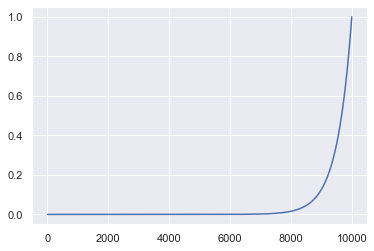

In [66]:
def f1(x):
    return x**(-1/2)
h=1e-9
x = np.logspace(np.log10(h),0,10000)
#print(x)
#print(-1/2)
print(sp.integrate.trapz(y=f1(x),x=x))
plt.plot(x)


0.20976826683089114


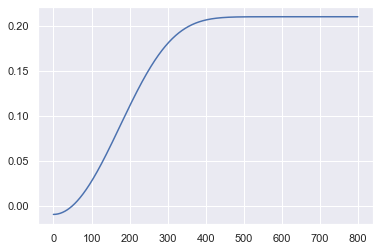

In [67]:

h = 1e-1
def int2(x_max):
    x = np.logspace(h,x_max,1000)
    def f2(x):
        #print(x)
        return np.exp(-x)*np.log(x)
    #print(f2(x))
    return sp.integrate.trapz(y=f2(x),x=x)

r = []
for i in range(800):
    r.append(int2(i/500))
plt.plot(r)
print(r[-1])


#print(sp.integrate.quad(lambda x: x**(-1/2),0,np.inf))

0.4258092036724763


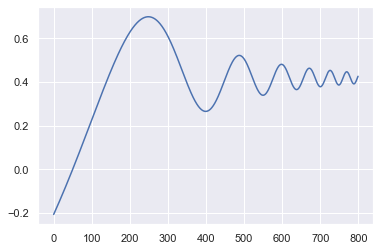

In [68]:

h = 1e-1
def int2(x_max):
    x = np.logspace(h,x_max,1000)
    def f2(x):
        #print(x)
        return np.sin(x)/x
    #print(f2(x))
    return sp.integrate.trapz(y=f2(x),x=x)

r = []
for i in range(800):
    r.append(int2(i/500))
plt.plot(r)
print(r[-1])

## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$

== DATOS REGRESION ==
-Ajuste:  0.9372778673910886
-Intercepto en 0 0.2674879566968516
-Las constantes para la ecuacion son:  [2.3470072  1.39333437 1.41005721 1.79580009]


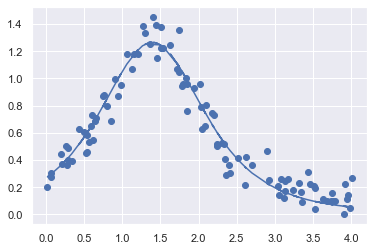

In [73]:
# Punto D

df = pd.read_pickle(r'C:\Users\marti\FISI2028-202120\soluciones\m.pelaez\tarea3\ex1.gz')

x = df["x"]
y = df["y"]

def f(C,x):
    return (C[0])/((x-C[1])**2 + C[2])**C[3]

def Lfit(K,x,y):
    DY=f(K,x) - y
    return np.dot(DY,DY)/len(y)

constantes4 = sp.optimize.minimize(fun=Lfit, x0=np.array([0,0,1,0]), args = (x,y), method='L-BFGS-B', tol=1e-5)

funEnY4 = f(constantes4.x,x)

plt.scatter(x,y)
plt.plot(x,funEnY4)

print('== DATOS REGRESION ==')
print("-Ajuste: ", 1-np.sum((funEnY4-y)**2)/np.sum((y-y.mean())**2))
print("-Intercepto en 0", f(constantes4.x,0))
print("-Las constantes para la ecuacion son: ", constantes4['x'])


In [74]:
# Intento de Fourier


1.393334372440823


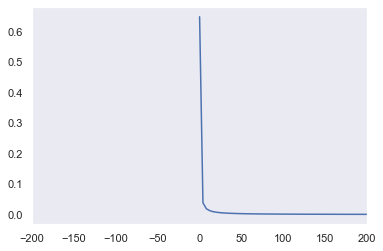

In [97]:
from scipy.fft import fft, fftfreq
print(constantes4.x[1])
# Number of samples in normalized_tone


N = 200
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)

y=(constantes4.x[0])/((x-constantes4.x[1])**2 + constantes4.x[2])**constantes4.x[3]
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([-200, 200])
plt.grid()
plt.show()
